### **Understand Linear Regression**
![markdown](https://github.com/denotevn/Machine-learning-tutorial/blob/main/tutorial_theory/picture/Linear%20Regression.png)

+ ***To understand more about Linear Regression algorithm: [Picture](https://github.com/denotevn/Machine-learning-tutorial/blob/main/Tutorial/picture/Linear%20Regression.png)***


### **How to evalue** 
#### what is R - Square
> R-Square value is a statistics measure of how close the data are to the fitted regression line
> It is also know as coeffcient of determination, or the coefficient of mutiple determination 

+ Example of caculate R^2 in this link : **[Cacl R^2](https://github.com/denotevn/Machine-learning-tutorial/blob/main/Tutorial/picture/Cacl%20R%5E2.png)**

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading data
data =pd.read_csv('/home/tuandinh/Desktop/MachineLearning/tutorial_theory/dataset/headbrain.csv')
print(data.shape)
data.tail()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170
236,2,2,3391,1120


In [41]:
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [42]:
# mean x and mean y
mean_x = X.mean()
mean_y = Y.mean()
# total number of values
n = len(X) # number of row
# Using formula to calculate b1 and b0
# y = b1*x + b0
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x)*(Y[i] - mean_y)
    denom += (X[i] - mean_x)**2
b1 = numer/denom
b0 = mean_y - (mean_x*b1)

print(b1, b0)



0.26342933948939945 325.57342104944223


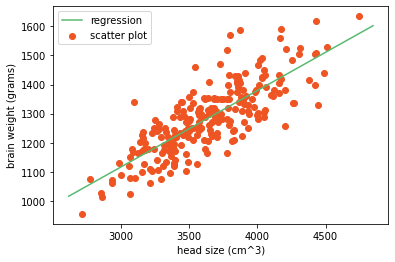

In [43]:
import matplotlib.pyplot as plt
max_x=np.max(X)+100
min_x=np.min(X)-100
x=np.linspace(min_x, max_x, 100)
y=b1*x+b0

plt.plot(x,y,color='#58b970',label='regression')
plt.scatter(X,Y,c='#ef5423',label='scatter plot')

plt.xlabel('head size (cm^3)')
plt.ylabel('brain weight (grams)')
plt.legend()

plt.show()

In [44]:
diff_actual_mean = 0
diff_predict_mean = 0
for i  in range(n):
    y_pred = b1 * X[i] + b0
    diff_predict_mean += (Y[i] - y_pred)**2
    diff_actual_mean += (Y[i] - mean_y)**2
r2 = 1 - (diff_predict_mean / diff_actual_mean)
print(r2) 

0.6393117199570003


### Using model in Scikit-Learning 

In [45]:
df = pd.read_csv('/home/tuandinh/Desktop/MachineLearning/tutorial_theory/dataset/headbrain.csv')
df.head()
X1 = df['Head Size(cm^3)'].values
Y1 = df['Brain Weight(grams)'].values

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
n = len(X1)
X1 = X1.reshape((n,1)) # chuyen ve matrix (nx1)
model = LinearRegression()
model.fit(X1,Y)
# mean_square_error
r2_score = model.score(X1,Y1)
print(r2_score)

0.639311719957


In [48]:
from sklearn import model_selection
n = len(X)
X = X.reshape(n,1)
x_train, x_test, y_train, y_test = model_selection.train_test_split(X,Y,train_size=0.8,random_state=6)
model2=LinearRegression().fit(x_train, y_train)
model2.score(x_test, y_test)

0.6203314269202964

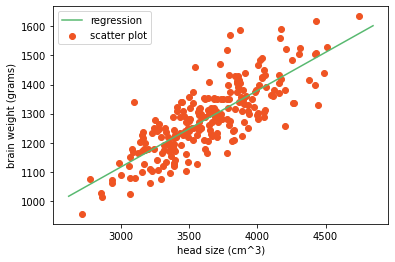

In [49]:
(m,c) = (model.coef_[0], model.intercept_)
max_x = max(X) + 100
min_x = min(X) - 100
x = np.linspace(min_x, max_x, 1000)
y1 = m*x + c

plt.plot(x,y1,color='#58b970',label='regression')
plt.scatter(X,Y,c='#ef5423',label='scatter plot')

plt.xlabel('head size (cm^3)')
plt.ylabel('brain weight (grams)')
plt.legend()

plt.show()